In [1]:
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import sys
from scipy import signal
import game_of_life as gol
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

# Setting up video encoder paths
ff_path = os.path.join('C:/', 'ImageMagick-7.0.9-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [102]:
importlib.reload(gol)

<module 'game_of_life' from 'C:\\Users\\arttu.lehtinen\\Desktop\\general_DataScience\\gameOfLife\\game_of_life.py'>

### Introduction

Jeff Conway’s Game of life is a cellular automata model that demonstrates how complexity can emerge in a very simple setting. It is used for example in Richards Dawkins book … to support the argument that evolution of complex organisms can be possible without an intelligent designer. In this project I implemented   Game of Life in Python and show couple of interesting results that this system can produce.

### Model

The world of game of life is a 2D grid which consisting of cells. These cells can have one of two states: they are alive or they are dead. Each game or simulation starts from an intial state called 'Seed', where some cells are set to be live and others are set to be dead. These can be easily implemented with numpy. We make a 2D array by choosing randomly if the values are 0 or 1 

In [92]:
Size=10
seed_array=np.random.choice([0, 1], size=(Size,Size))
seed_array

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 0, 0, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]])

Using visualization function from my script we can plot the array as follows:

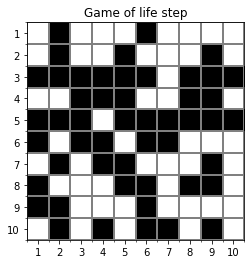

In [93]:
ax=gol.plot_step(seed_array)

The time dynamics come into play when we update the value of the cells with the following rules:
1.	Any live cell with two or three neighbors survives.
2.	Any dead cell with three live neighbors becomes a live cell.
3.	All other live cells die in the next generation. Similarly, all other dead cells stay dead.

Let's make a Game of life simulation of 50 steps with:


In [96]:
game=gol.GameOfLife(seed_array)
steps=game.run(duration=100)

[[0 1 0 0 0 1 0 0 0 0]
 [0 1 0 0 1 0 0 0 1 0]
 [1 1 1 1 1 1 0 1 1 1]
 [0 0 1 1 1 0 0 1 1 0]
 [1 1 1 0 1 1 1 1 1 1]
 [1 0 1 1 0 1 1 0 0 0]
 [0 1 0 1 1 0 0 0 1 0]
 [1 0 0 0 1 1 0 1 1 0]
 [1 1 0 0 0 1 0 0 0 0]
 [0 1 0 1 0 1 1 0 1 0]]


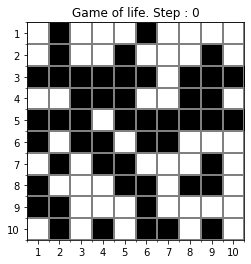

In [107]:
anim= gol.gol_animation(steps)

In [108]:
HTML(anim.to_html5_video())

In [104]:
anim